# Fitting relatative permeability with Corey function

$k_{r_w}$ and $k_{r,o}$ are fitted simultnaeously.

Therefore, we don't use the lmfit.model() but instead the lmfit.Minimizer() functionality

and define a residual function that returns the residuals of both krw and kro combined

which is then minimized by lmfit.minimizer()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Parameters, Minimizer

### define Corey functions

Using Corey functions with c-parameter modification for the tail-end porition of the kr curve (after Masalmeh SPE-109094)

$k_{r,w} = k_{r,w}(S_{o,r}) \left( \frac{S_w - S_{w,c}}{1-S_{w,c}-S_{o,r}} \right)^{n_w} + \frac{c_w}{1+c_w}\left( \frac{S_w - S_{w,c}}{1-S_{w,c}-S_{o,r}}\right)$

$k_{r,o} = k_{r,o}(S_{w,c}) \left( \frac{1-S_w - S_{o,r}}{1-S_{w,c}-S_{o,r}} \right)^{n_o} + \frac{c_o}{1+c_o}\left( \frac{S_w - S_{w,c}}{1-S_{w,c}-S_{o,r}}\right)$


In [2]:
def krw(Sw,krwSor,kroSwc,Swc,Sor,nw,no,cw):
    return krwSor*np.abs((Sw-Swc)/(1-Swc-Sor))**nw+cw/(1+cw)*((Sw-Swc)/(1-Swc-Sor))

def kro(Sw,krwSor,kroSwc,Swc,Sor,nw,no,co):
    return kroSwc*np.abs((1-Sw-Sor)/(1-Swc-Sor))**no+co/(1+co)*((1-Sw-Sor)/(1-Swc-Sor))

### read krw and kro data sets from Excel file

In [4]:
 filename='relperm.xlsx'

data = pd.read_excel(filename)

In [ ]:
# inspect what is in the data frame
print(dir(data))
print(data.var())

['Sw', 'T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_e

### plot data

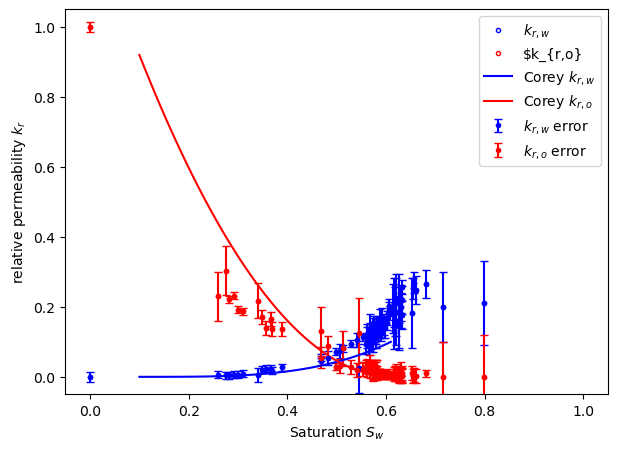

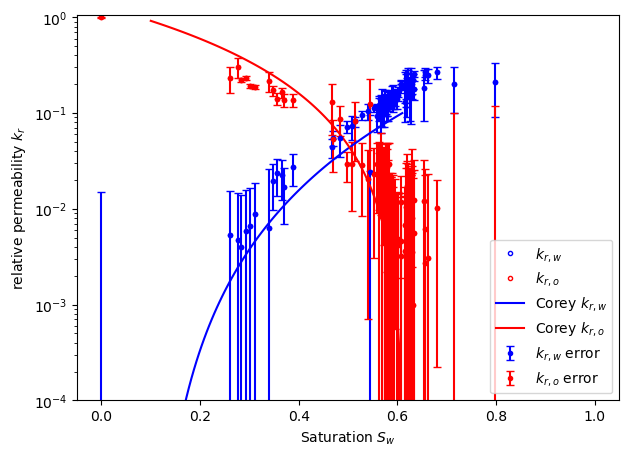

In [5]:
# some initial guess values for the Corey parameters just to "manually" fit the data

Swc=0.1
Sor=0.39
krwep=0.1
kroep=0.9
nw=3.5
no=2.0
cw=0.0
co=0.02


Swdrain= np.linspace(Swc,1.0-Sor,num=100)

plt.figure(figsize=(7, 5))
plt.plot(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.plot(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,o}')

plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", label='$k_{r,w}$ error')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", label='$k_{r,o}$ error')


plt.plot(Swdrain, krw(Swdrain,krwep,kroep,Swc,Sor,nw,no,cw), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$')
plt.plot(Swdrain, kro(Swdrain,krwep,kroep,Swc,Sor,nw,no,co), '-', color='red', fillstyle='none', label='Corey $k_{r,o}$')

plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.legend();
plt.xlabel('Saturation $S_w$'); plt.ylabel('relative permeability $k_r$')
#plt.title('Relative Permeability');
plt.show()

plt.figure(figsize=(7, 5))
plt.semilogy(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.semilogy(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,o}$')
plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", label='$k_{r,w}$ error')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", label='$k_{r,o}$ error')

plt.semilogy(Swdrain, krw(Swdrain,krwep,kroep,Swc,Sor,nw,no,cw), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$')
plt.semilogy(Swdrain, kro(Swdrain,krwep,kroep,Swc,Sor,nw,no,co), '-', color='red', fillstyle='none', label='Corey $k_{r,o}$')

plt.axis([-0.05, 1.05, 1E-4, 1.05])
plt.legend();
plt.xlabel('Saturation $S_w$'); plt.ylabel('relative permeability $k_r$')
#plt.title('Relative Permeability');
plt.show()

### define cost function

In [6]:
# krw and kro are fitted simultnaeously
# therefore, we don't use the lmfit.model() but instead the lmfit.Minimizer() functionality
# and define a residual function that returns the residuals of both krw and kro combined
# which is then minimized by lmfit.minimizer()


def residual(params, x, data):
    Swc = params['Swc']
    Sor = params['Sor']
    krwSor = params['krwSor']
    kroSwc = params['kroSwc']
    nw = params['nw']
    no = params['no']
    cw = params['cw']
    co = params['co']

    modelw = krw(x,krwSor,kroSwc,Swc,Sor,nw,no,cw)
    modelo = kro(x,krwSor,kroSwc,Swc,Sor,nw,no,co)

    residuals_w = (data['krw'] - modelw)/data['krwerr'] 
    residuals_o = (data['kro'] - modelo)/data['kroerr']
    return np.concatenate([residuals_w, residuals_o])

### define parameters

In [7]:
pars=Parameters()
# set up the initial parameter values
pars.add('Swc', value=0.0, min=0, max=0.5,vary=False)
pars.add('Sor', value=0.39, min=0, max=0.5,vary=False)  
pars.add('krwSor', value=0.25, min=0.05, max=1.0, vary=True)
pars.add('kroSwc', value=0.9, min=0.2, max=1.0, vary=True)
pars.add('nw', value=4.0, min=1.8, max=6, vary=True)
pars.add('no', value=2.0, min=1.8, max=6, vary=True)
pars.add('cw', value=0.0, min=0.0, max=0.05, vary=False)
pars.add('co', value=0.02, min=0, max=0.5, vary=True)


### plot initial guesses

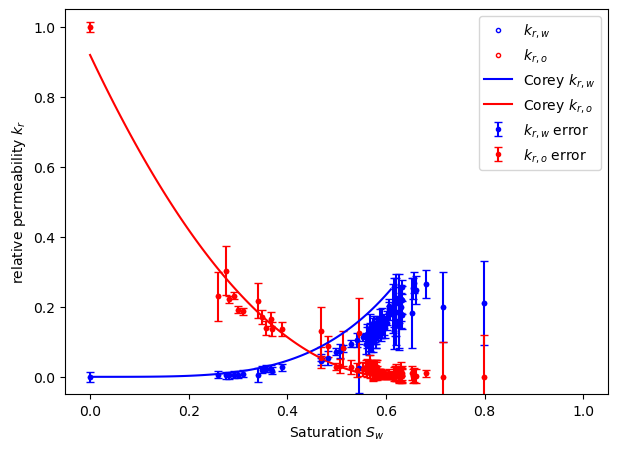

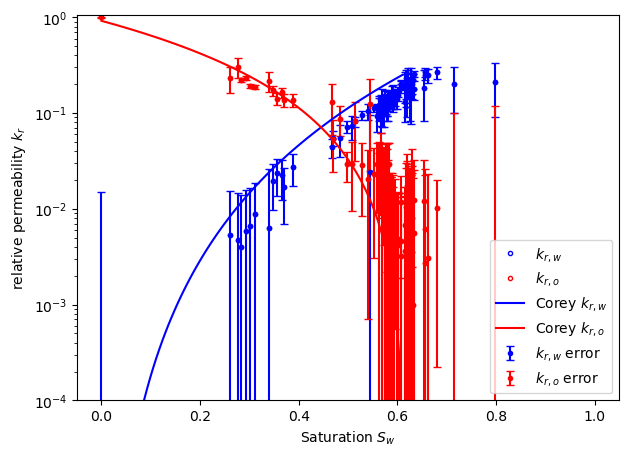

In [8]:
Swdrain= np.linspace(pars['Swc'],1.0-pars['Sor'],num=100)

plt.figure(figsize=(7, 5))
plt.plot(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.plot(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,o}$')

plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", label='$k_{r,w}$ error')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", label='$k_{r,o}$ error')

plt.plot(Swdrain, krw(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['cw']), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$')
plt.plot(Swdrain, kro(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['co']), '-', color='red', fillstyle='none', label='Corey $k_{r,o}$')


plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.legend();
plt.xlabel('Saturation $S_w$'); plt.ylabel('relative permeability $k_r$')
#plt.title('Relative Permeability');
plt.show()

plt.figure(figsize=(7, 5))
plt.semilogy(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.semilogy(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,o}$')

plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", label='$k_{r,w}$ error')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", label='$k_{r,o}$ error')

plt.semilogy(Swdrain, krw(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['cw']), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$')
plt.semilogy(Swdrain, kro(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['co']), '-', color='red', fillstyle='none', label='Corey $k_{r,o}$')


plt.axis([-0.05, 1.05, 1E-4, 1.05])
plt.legend();
plt.xlabel('Saturation $S_w$'); plt.ylabel('relative permeability $k_r$')
#plt.title('Relative Permeability');
plt.show()

### execute the fit

In [9]:
#fitter=Minimizer(residual,pars,fcn_args=(data.Sw,data))
fitter=Minimizer(residual,pars,fcn_args=(data.Sw,data),nan_policy='omit')
result=fitter.minimize()

result.params.pretty_print()
pars1=result.params

Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
Sor         0.39        0      0.5        0    False     None     None
Swc            0        0      0.5        0    False     None     None
co        0.2048        0      0.5  0.03515     True     None     None
cw             0        0     0.05        0    False     None     None
kroSwc    0.8277      0.2        1  0.02655     True     None     None
krwSor    0.1699     0.05        1 0.002722     True     None     None
no         2.833      1.8        6   0.1204     True     None     None
nw         4.329      1.8        6   0.1691     True     None     None


In [10]:
result

### plot results after fit

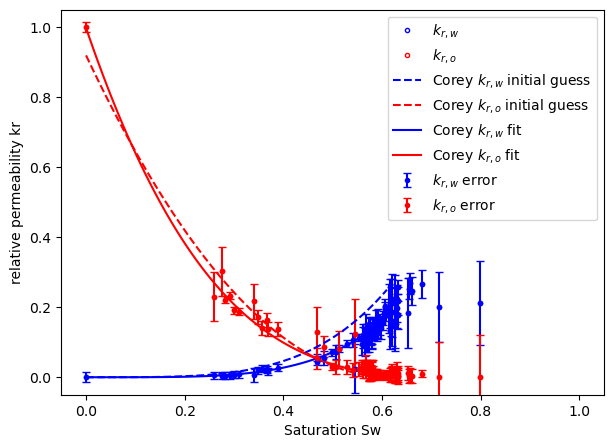

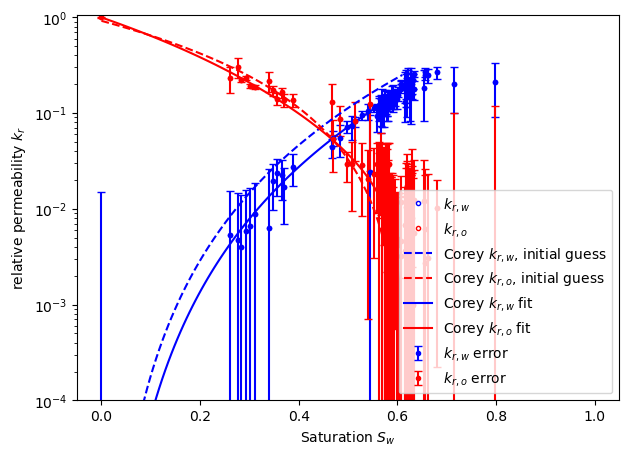

In [11]:
Swdrain= np.linspace(pars1['Swc'],1.0-pars1['Sor'],num=100)

plt.figure(figsize=(7, 5))
plt.plot(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.plot(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,o}$')

plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", label='$k_{r,w}$ error')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", label='$k_{r,o}$ error')

plt.plot(Swdrain, krw(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['cw']), '--', color='blue', fillstyle='none', label='Corey $k_{r,w}$ initial guess')
plt.plot(Swdrain, kro(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['co']), '--', color='red', fillstyle='none', label='Corey $k_{r,o}$ initial guess')

plt.plot(Swdrain, krw(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['cw']), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$ fit')
plt.plot(Swdrain, kro(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['co']), '-', color='red', fillstyle='none', label='Corey $k_{r,o}$ fit')

plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.legend();
plt.xlabel('Saturation Sw'); plt.ylabel('relative permeability kr')
#plt.title('Relative Permeability');
plt.show()

plt.figure(figsize=(7, 5))
plt.semilogy(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.semilogy(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,o}$')

plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", label='$k_{r,w}$ error')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", label='$k_{r,o}$ error')

plt.semilogy(Swdrain, krw(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['cw']), '--', color='blue', fillstyle='none', label='Corey $k_{r,w}$, initial guess')
plt.semilogy(Swdrain, kro(Swdrain,pars['krwSor'],pars['kroSwc'],pars['Swc'],pars['Sor'],pars['nw'],pars['no'],pars['co']), '--', color='red', fillstyle='none', label='Corey $k_{r,o}$, initial guess')

plt.semilogy(Swdrain, krw(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['cw']), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$ fit')
plt.semilogy(Swdrain, kro(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['co']), '-', color='red', fillstyle='none', label='Corey $k_{r,o}$ fit')

plt.axis([-0.05, 1.05, 1E-4, 1.05])
plt.legend();
plt.xlabel('Saturation $S_w$'); plt.ylabel('relative permeability $k_r$')
#plt.title('Relative Permeability');
plt.show()

### estimating uncertainty ranges
Unfortunately the lmfit.minimizer() function does not have the .eval_uncertainty(simga=3) function (only the lmfit.model() has this)
Therefore, we need to construct the uncertainty ranges for krw and kro by sampling from the uncerty ranges for each fit parameter

In [12]:
# compare number of LET parameters and size of covariance matrix
print('number of fit parameters = ', len(result.params))
print('size of covariance matrix = ', len(result.covar))


# make covariance matrix for all parameters
parvary=[['Swc',0], ['Sor',0], ['krwSor',0], ['kroSwc',0], ['nw',0], ['no',0],['cw',0], ['co',0]]

for i in range(len(parvary)):
    if result.params[parvary[i][0]].vary==True:
         parvary[i][1]=1
    else:
         parvary[i][1]=0

#print(parvary)

# make new covariance matrix of size len(parvary) x len(parvary)
covarmatrix = np.zeros((len(parvary),len(parvary)))  

# transfer covariance matrix for varied parameters to new covariance matrix     
ci=0
cj=0
for i in range(len(parvary)):
     if parvary[i][1]==1:
        for j in range(len(parvary)):
            if parvary[j][1]==1:
               covarmatrix[i][j]=result.covar[ci,cj]
               cj+=1
        cj=0
        ci+=1
               
#print(covarmatrix)


## Run iterations with new covariance matrix
# Number of traces
ntraces = 2500

# Initialize random number generator
rng = np.random.default_rng()

# Draw samples by considering the covariance matrix
samples_cov = rng.multivariate_normal(np.array([param.value for param in result.params.values()]), covarmatrix, ntraces).T

# Remove parameter limits to allow for negative values for the sampling - then apply strict Corey boundary conditions later.
fiterroract = result.params.copy()   # need to make a copy of the result.params object
for param in fiterroract.values():
    param.min = -np.inf
    param.max = np.inf


# Initialize arrays to store the relative permeability curves
#swv = np.linspace(0,1,101)
swv=np.linspace(pars1['Swc'],1.0-pars1['Sor'],num=100)
curves_kr1 = np.zeros((ntraces, len(swv)))
curves_kr2 = np.zeros((ntraces, len(swv)))

paramnames=['Swc', 'Sor', 'krwSor', 'kroSwc', 'nw', 'no','cw', 'co']    

# Loop over the samples
index_counter = 0
for i in range(ntraces):
    try:
        for l in range(len(paramnames)):
            fiterroract[paramnames[l]].value = samples_cov[l, i]
        curves_kr1[index_counter, :] = krw(swv,fiterroract['krwSor'].value,fiterroract['kroSwc'].value,fiterroract['Swc'].value,fiterroract['Sor'].value,fiterroract['nw'].value,fiterroract['no'].value,fiterroract['cw'].value)
        curves_kr2[index_counter, :] = kro(swv,fiterroract['krwSor'].value,fiterroract['kroSwc'].value,fiterroract['Swc'].value,fiterroract['Sor'].value,fiterroract['nw'].value,fiterroract['no'].value,fiterroract['co'].value)
        index_counter +=1
    except Exception as e:
        print(f"Error at iteration {i}: {e}")
        continue

# Remove unused rows
curves_kr1=curves_kr1[0:index_counter,:]
curves_kr2=curves_kr2[0:index_counter,:]

# Calculate the 2.5th and 97.5th percentiles
lower_kr1 = np.percentile(curves_kr1, 2.5, axis=0)
upper_kr1 = np.percentile(curves_kr1, 97.5, axis=0)
lower_kr2 = np.percentile(curves_kr2, 2.5, axis=0)
upper_kr2 = np.percentile(curves_kr2, 97.5, axis=0)

number of fit parameters =  8
size of covariance matrix =  5


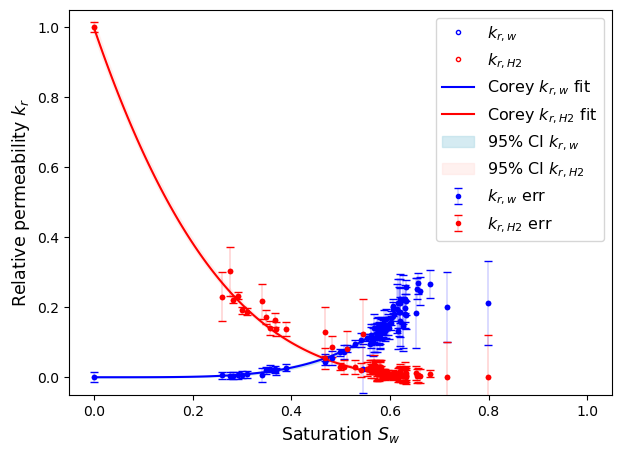

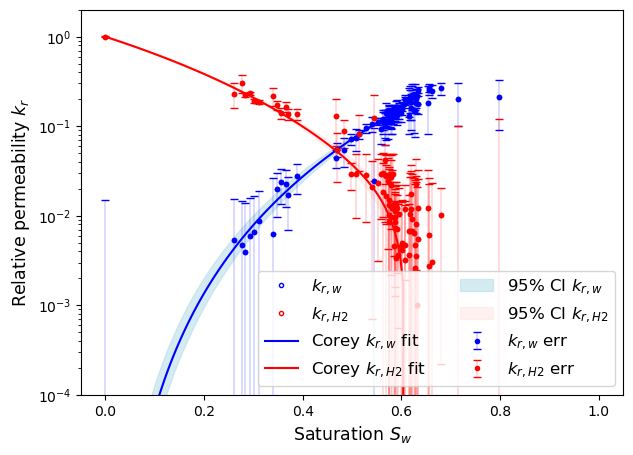

In [13]:
Swdrain= np.linspace(pars1['Swc'],1.0-pars1['Sor'],num=100)

plt.figure(figsize=(7, 5))
plt.plot(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.plot(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,H2}$')

plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", elinewidth=0.2, label='$k_{r,w}$ err')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", elinewidth=0.2, label='$k_{r,H2}$ err')

plt.plot(Swdrain, krw(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['cw']), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$ fit')
plt.plot(Swdrain, kro(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['co']), '-', color='red', fillstyle='none', label='Corey $k_{r,H2}$ fit')

plt.fill_between(swv, lower_kr1, upper_kr1, color='lightblue', alpha=0.5, label='95% CI $k_{r,w}$')
plt.fill_between(swv, lower_kr2, upper_kr2, color='mistyrose', alpha=0.5, label='95% CI $k_{r,H2}$')

plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.legend( fontsize=11.5, ncols=1);
plt.xlabel('Saturation $S_w$',  fontsize=12.5); plt.ylabel('Relative permeability $k_r$',  fontsize=12.5)
#plt.title('Relative Permeability');
plt.show()

plt.figure(figsize=(7, 5))
plt.semilogy(data.Sw, data.krw, '.', color='blue', fillstyle='none', label='$k_{r,w}$')
plt.semilogy(data.Sw, data.kro, '.', color='red', fillstyle='none', label='$k_{r,H2}$')

plt.errorbar(data.Sw, data.krw, yerr=data.krwerr, capsize=3, fmt=".", color='blue', ecolor = "blue", elinewidth=0.2, label='$k_{r,w}$ err')
plt.errorbar(data.Sw, data.kro, yerr=data.kroerr, capsize=3, fmt=".", color='red', ecolor = "red", elinewidth=0.2, label='$k_{r,H2}$ err')

plt.semilogy(Swdrain, krw(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['cw']), '-', color='blue', fillstyle='none', label='Corey $k_{r,w}$ fit')
plt.semilogy(Swdrain, kro(Swdrain,pars1['krwSor'],pars1['kroSwc'],pars1['Swc'],pars1['Sor'],pars1['nw'],pars1['no'],pars1['co']), '-', color='red', fillstyle='none', label='Corey $k_{r,H2}$ fit')

plt.fill_between(swv, lower_kr1, upper_kr1, color='lightblue', alpha=0.5, label='95% CI $k_{r,w}$')
plt.fill_between(swv, lower_kr2, upper_kr2, color='mistyrose', alpha=0.5, label='95% CI $k_{r,H2}$')

plt.axis([-0.05, 1.05, 1E-4, 2])
plt.legend( fontsize=12, ncols=2)
plt.xlabel('Saturation $S_w$',  fontsize=12.5); plt.ylabel('Relative permeability $k_r$',  fontsize=12.5)
#plt.title('Relative Permeability');
plt.show()

### Plot correlation matrix

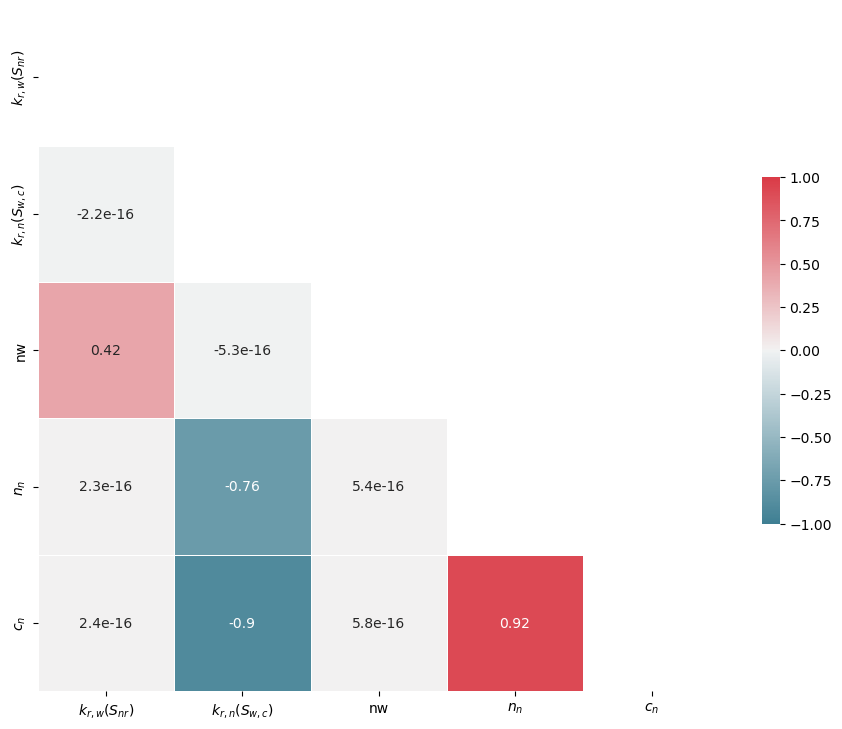

In [15]:
import seaborn as sns

def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation


correlation=correlation_from_covariance(result.covar)

Coreynames=[]
# generate names of fit parameters automatically 
for i in range (len(parvary)):
    if parvary[i][1]==1:
        Coreynames.append(parvary[i][0])

Coreynames = [
    '$n_n$' if name == 'no' else
    '$k_{r,w}(S_{nr})$' if name == 'krwSor' else
    '$k_{r,n}(S_{w,c})$' if name == 'kroSwc' else
    '$c_n$' if name == 'co' else
    name
    for name in Coreynames
]

#corr = pd.DataFrame(data=correlation, index=LETnames, columns=LETnames)
corr = pd.DataFrame(data=correlation, index=Coreynames, columns=Coreynames)


# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=1.0,       # The maximum value of the legend. All higher vals will be same color
    vmin=-1.0,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

plt.show()